Watershed Algorithm 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import cv2

In [2]:
def display(img, cmap= None):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap=cmap)

In [3]:
img = cv2.imread('rainfall_input2.jpeg',cv2.IMREAD_COLOR_RGB)

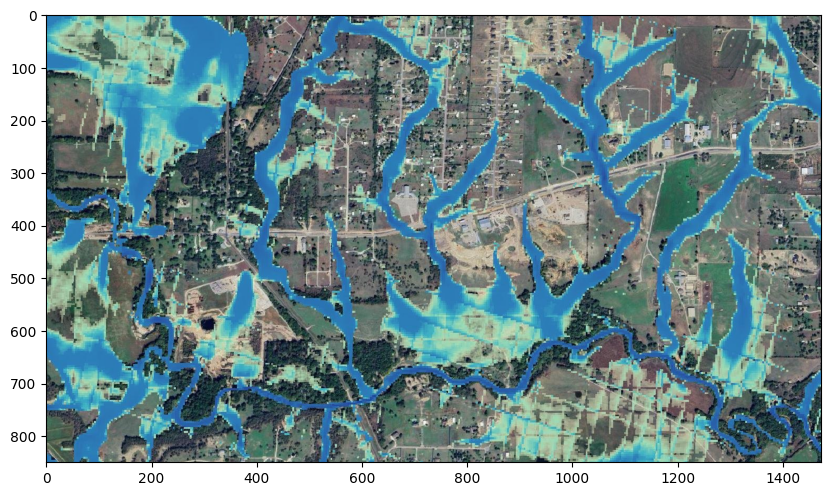

In [4]:
display(img)

In [5]:
img = cv2.medianBlur(img, 35)

In [6]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [7]:
# Apply threshold 
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

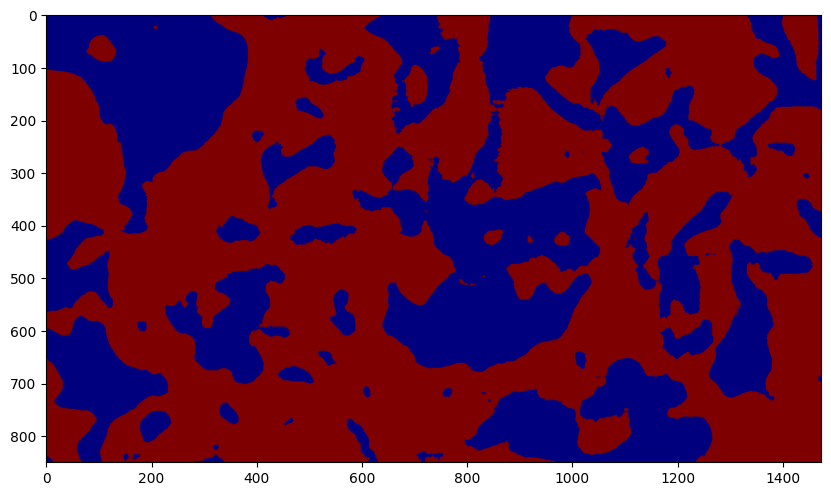

In [8]:
display(thresh, cmap='jet')

In [9]:
# Noise removal 
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

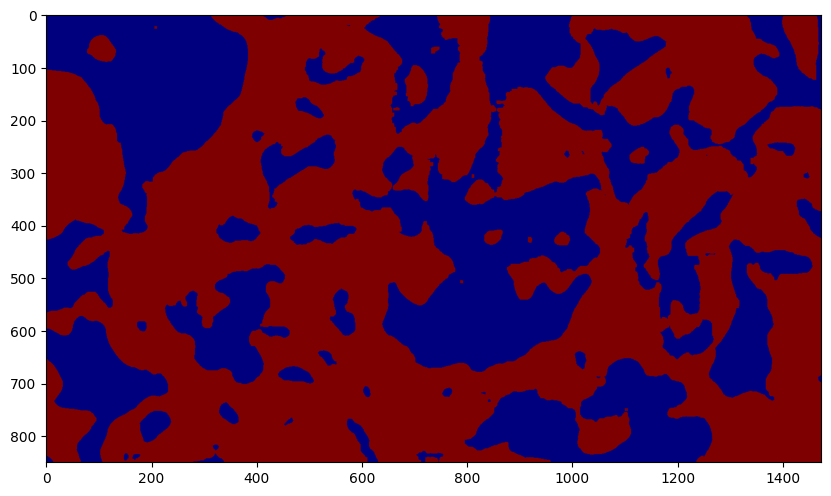

In [10]:
display(opening, cmap='jet')

In [11]:
# sure background area 
sure_bg = cv2.dilate(opening, kernel, iterations=3)

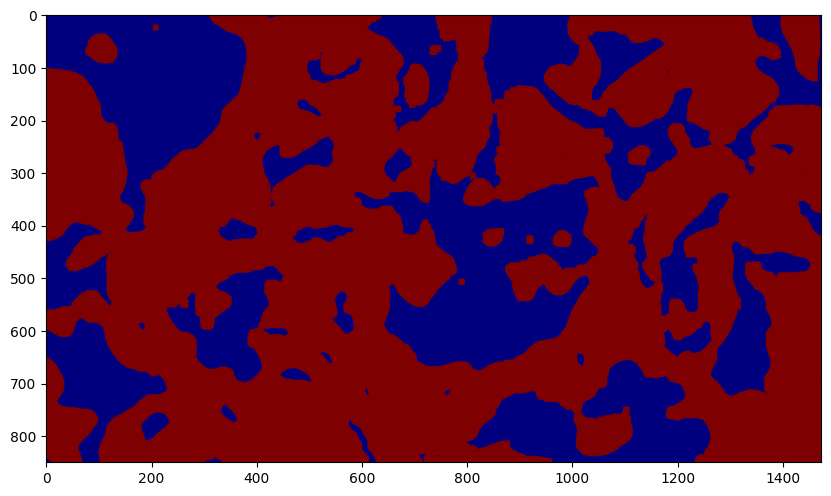

In [12]:
display(sure_bg, cmap='jet')

In [13]:
# finding sure firground 
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)

In [14]:
ret, sure_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(), 255, 0)

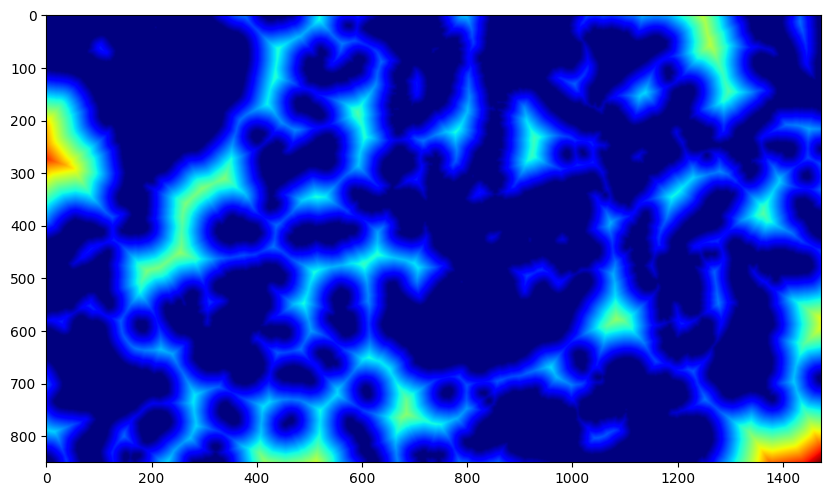

In [15]:
display(dist_transform, cmap='jet')

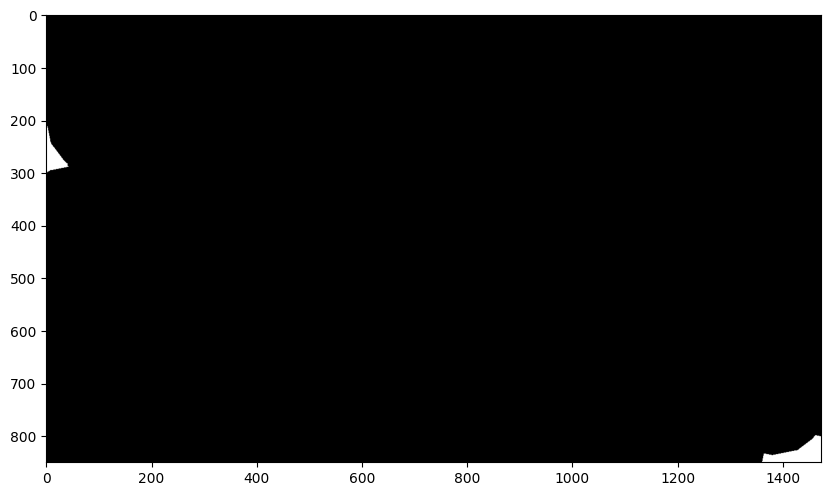

In [16]:
display(sure_fg, cmap='gray')

In [17]:
# find unknown result 
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

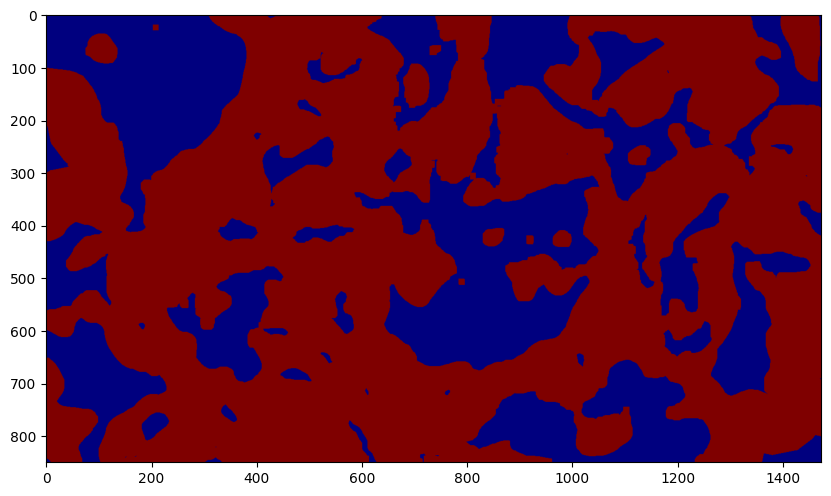

In [18]:
display(unknown, cmap='jet')

In [19]:
# Label markers 
ret, markers = cv2.connectedComponents(sure_fg)

markers = markers + 1

markers[unknown==255] = 0

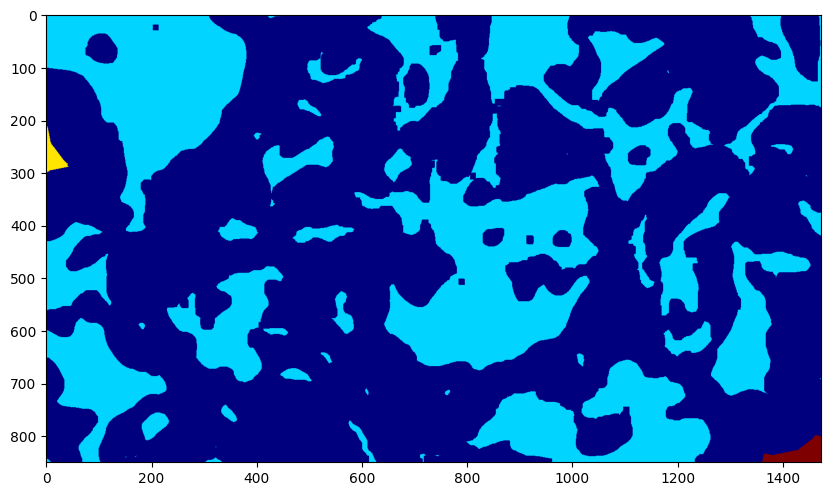

In [20]:
display(markers, cmap='jet')

In [21]:
# Apply watreshed algorithm 
markers1 = cv2.watershed(img, markers)

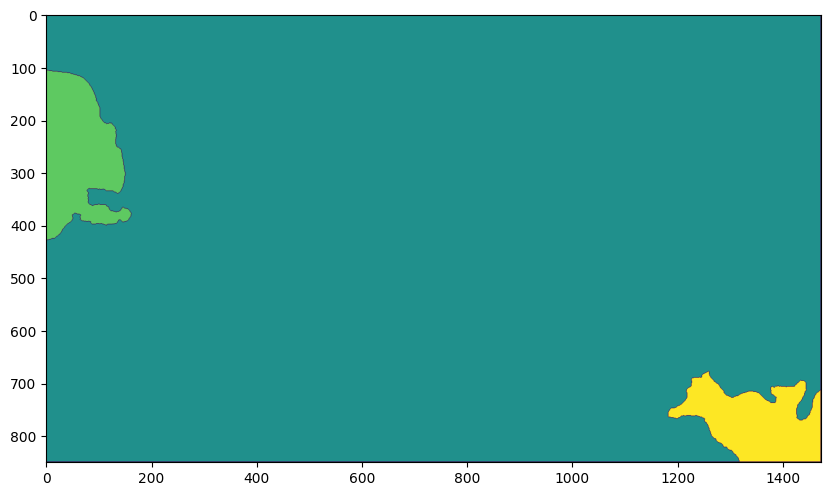

In [22]:
display(markers1)

In [23]:
contours, hierarchy = cv2.findContours(markers.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
img1 = img
# for every entry in contours 
for i in range(len(contours)):

    # last column in the array is -1 if an external contours (no contours inside of it)
    if hierarchy[0][i][3] == -1:
        #we can now draw the external contour (no contour inside of it)
        cv2.drawContours(img1, contours, i, (255, 0, 0), 10)

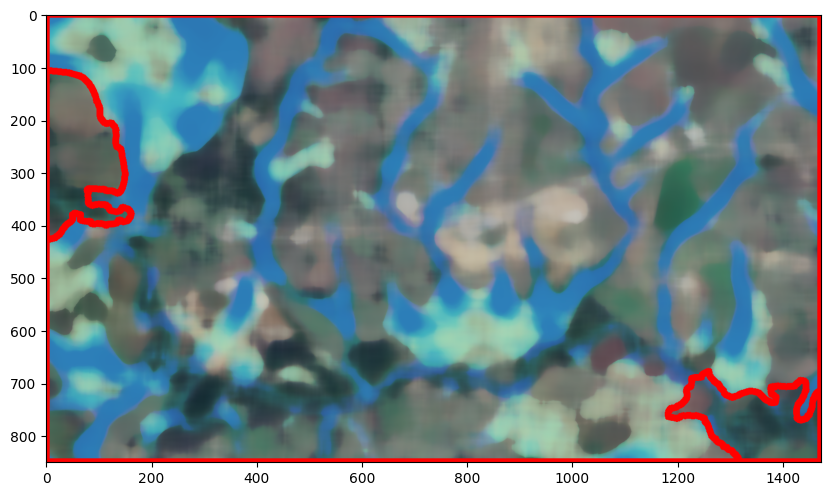

In [24]:
display(img1)

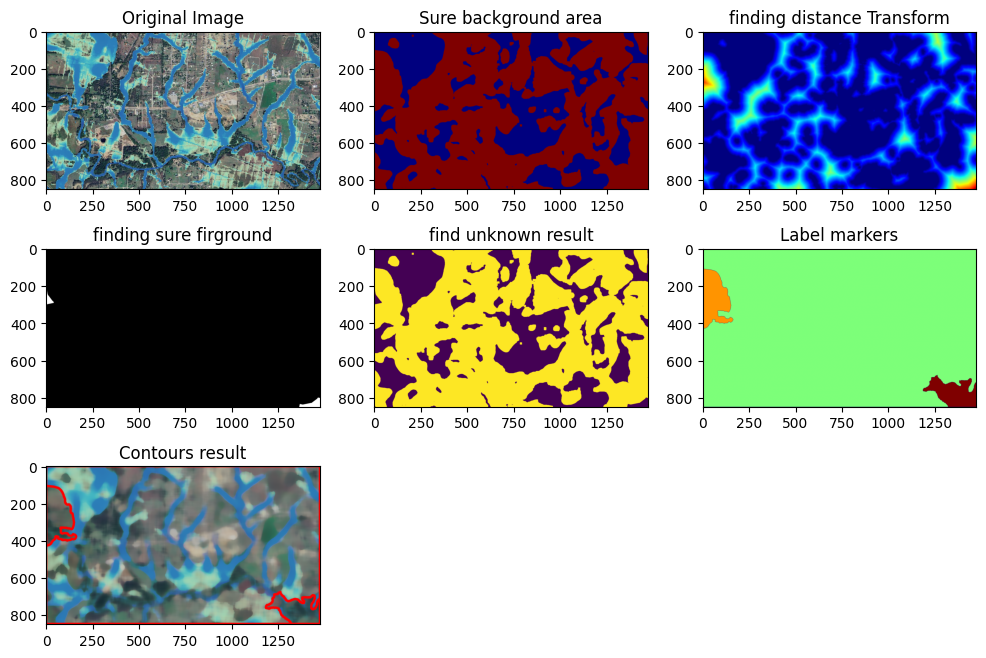

In [33]:
# visualization 
plt.figure(figsize=(12,8))
plt.subplot(3,3,1)
plt.title('Original Image')
image = cv2.imread('rainfall_input2.jpeg', cv2.IMREAD_COLOR_RGB)
plt.imshow(image)

#plt.subplot(3,3,2)
#plt.imshow(thresh, cmap='jet')

#plt.subplot(3,3,3)
#plt.imshow(opening, cmap='jet')

plt.subplot(3,3,2)
plt.title('Sure background area')
plt.imshow(sure_bg, cmap='jet')

plt.subplot(3,3,3)
plt.title('finding distance Transform')
plt.imshow(dist_transform, cmap='jet')

plt.subplot(3,3,4)
plt.title('finding sure firground')
plt.imshow(sure_fg,cmap='gray')

plt.subplot(3,3,5)
plt.title('find unknown result')
plt.imshow(unknown, cmap='viridis')

plt.subplot(3,3,6)
plt.title('Label markers')
plt.imshow(markers, cmap='jet')

plt.subplot(3,3,7)
plt.title('Contours result')
plt.imshow(img1, cmap='viridis')

plt.savefig('Watershad_algorithm_output1.png')
plt.show()